###  CODSOFT TASK 1

###  TITANIC SURVIVAL PREDICTION

#### NAME : Ashwini G
#### BATCH : A11
#### DOMAIN : Data Science

##### Aim : To build a model to predict that passengers in the Titanic as survived or not after ship wreked.

In [1]:
from IPython.display import Image
Image(url="https://assets.editorial.aetnd.com/uploads/2012/04/sinking-of-the-titanic-gettyimages-542907919-1.jpg", height=400,width=1000)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r'C:\Users\Dell\OneDrive\Documents\tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### DATA CLEANING

In [4]:
df.shape

(418, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
df['Cabin'].isnull().value_counts()

Cabin
True     327
False     91
Name: count, dtype: int64

In [9]:
df.drop(['Cabin','SibSp','Parch','Fare','Ticket','Name','Embarked'],axis=1,inplace=True)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age
0,892,0,3,male,34.5
1,893,1,3,female,47.0
2,894,0,2,male,62.0
3,895,0,3,male,27.0
4,896,1,3,female,22.0


In [11]:
df['Age'].isnull().value_counts()

Age
False    332
True      86
Name: count, dtype: int64

In [12]:
mean_value = df['Age'].mean()

In [13]:
df['Age'].fillna(mean_value, inplace=True)

In [14]:
df['Age'].isnull().value_counts()

Age
False    418
Name: count, dtype: int64

In [15]:
df['Age']=df['Age'].astype(int)

In [16]:
(df['Age']==0).value_counts()

Age
False    413
True       5
Name: count, dtype: int64

#### DATA ANALYSING USING GRAPHICAL PLOTS

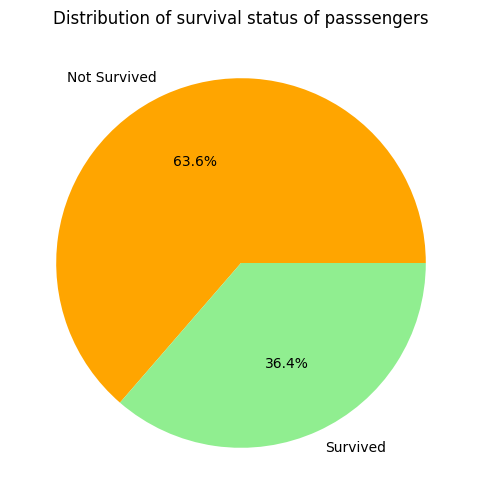

In [17]:
survived_counts = df['Survived'].value_counts()

counts = survived_counts.values

plt.figure(figsize=(6, 6))
plt.pie(counts, labels = ['Not Survived', 'Survived'], autopct='%1.1f%%', colors=['orange','lightgreen'])
plt.title("Distribution of survival status of passsengers")
plt.show()

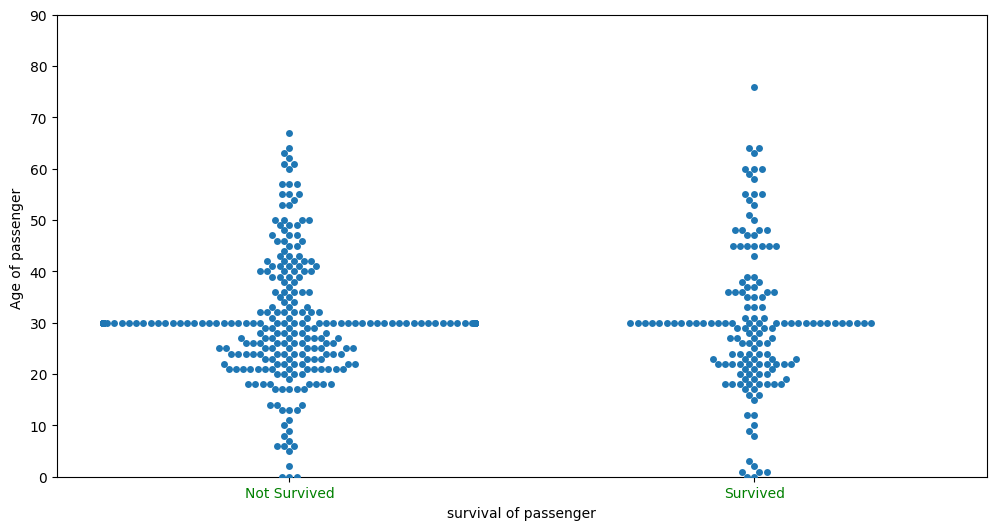

In [18]:
plt.figure(figsize=(12,6))
sns.swarmplot(y=df['Age'],x=df['Survived'])
plt.xlabel('survival of passenger')
plt.ylabel('Age of passenger ')
plt.ylim(0,90,10)
plt.xticks([0,1],['Not Survived','Survived'],color='green')
plt.show()

In [19]:
df['Pclass'].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

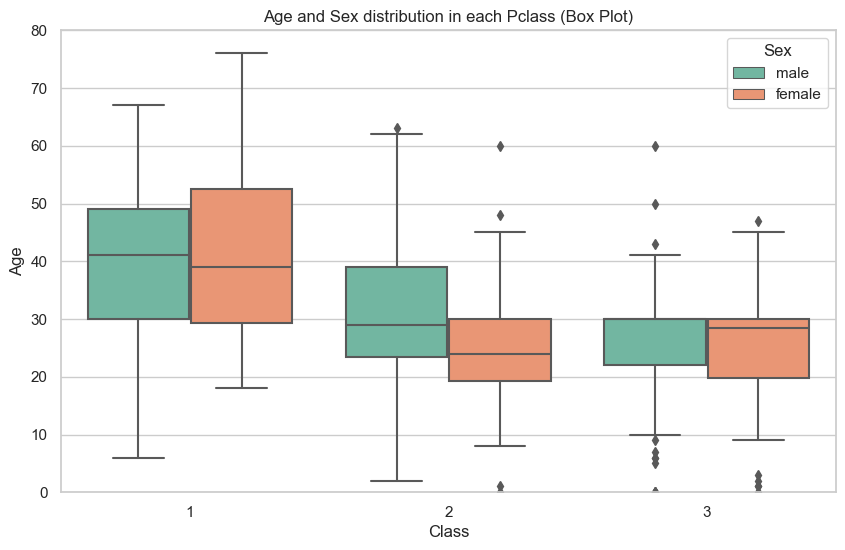

In [20]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df,x='Pclass', y='Age', hue='Sex',  palette='Set2')

plt.xlabel('Class')
plt.ylabel('Age')
plt.ylim(0,80,10)
plt.title('Age and Sex distribution in each Pclass (Box Plot)')
plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
lb=LabelEncoder()

In [23]:
df['Sex']=lb.fit_transform(df['Sex'])

In [24]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(418, 4)
(418,)


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(334, 4)
(84, 4)
(334,)
(84,)


In [27]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [28]:
def eval_class(y_test,y_pred):
    con_mat=confusion_matrix(y_test,y_pred)
    acc_scr=accuracy_score(y_test,y_pred)
    cls_rpt=classification_report(y_test,y_pred)
    
    print(con_mat)
    print('Accuracy score',acc_scr)
    print('Classification report',cls_rpt)
    
def model_score(model):
    print('Training score',model.score(x_train,y_train))
    print('Testing score',model.score(x_test,y_test))

### Logistic regression model

In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
model_score(log_reg)

Training score 1.0
Testing score 1.0


In [31]:
ypred_log_reg=log_reg.predict(x_test)
ypred_log_reg

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [32]:
eval_class(y_test,ypred_log_reg)

[[50  0]
 [ 0 34]]
Accuracy score 1.0
Classification report               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [33]:
df['Survived_predict']=log_reg.predict(x)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Survived_predict
0,892,0,3,1,34,0
1,893,1,3,0,47,1
2,894,0,2,1,62,0
3,895,0,3,1,27,0
4,896,1,3,0,22,1


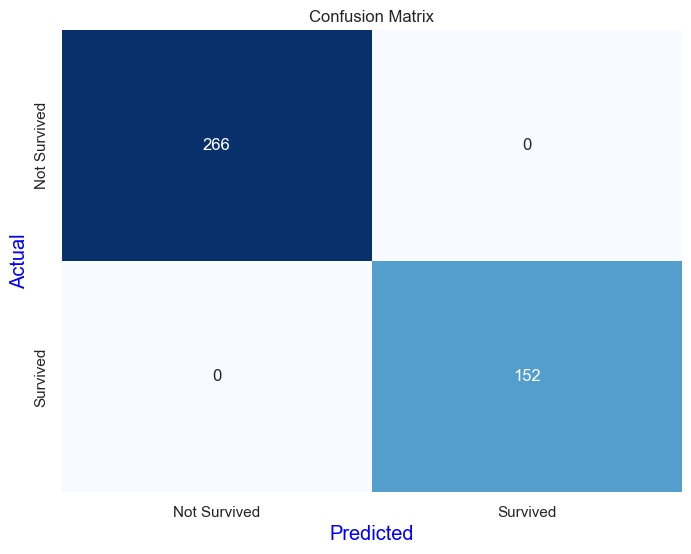

In [34]:
cm = confusion_matrix(df["Survived"], df["Survived_predict"])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Not Survived','Survived'],
            yticklabels=['Not Survived','Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted',fontsize='large',color='blue')
plt.ylabel('Actual',fontsize='large',color='blue')
plt.show()

#### HERE PREDICTING THE PASSENGERS ARE SURVIVED OR NOT.

In [35]:
from PIL import Image

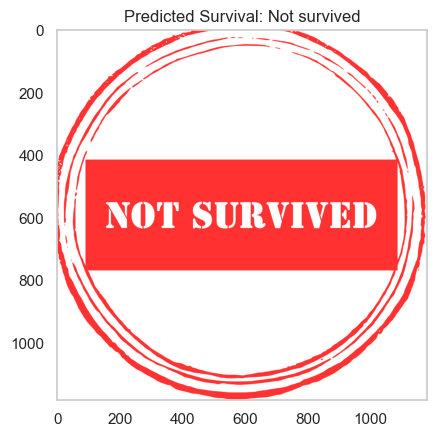

In [36]:
survived_image = Image.open('C:\\Users\\Dell\\Downloads\\survive-text-written-red-vintage-stamp-survive-text-written-red-round-vintage-rubber-stamp-204994799.webp')
not_suvived_image = Image.open('C:\\Users\\Dell\\Downloads\\Green Rustic Natural Organic Vegan Stamp Circle Sticker.png')

survival_status = {
    0: ("Not survived", not_suvived_image),
    1: ("Survived", survived_image)
}

Passenger_ID = int(input("Enter Passenger Id: "))       # give input value for passengerid from (892 to 1309)
Passenger_class= int(input("Enter Passenger class: "))  # give input value for passenger class (1, 2, 3)
Passenger_sex = int(input("Enter Passenger sex: "))     # give input value for passenger sex (1= 'male' , 0= 'female')
Passengers_age = int(input("Enter Passengers Age: "))   # give input value for passengers age from (0 to 76)


Passenger_info = np.array([[Passenger_ID,Passenger_class ,Passenger_sex, Passengers_age]])

prediction = log_reg.predict(Passenger_info)

Predict_survival, predicted_image = survival_status.get(prediction[0], ("Unknown", None))

if predicted_image:
    plt.imshow(predicted_image)
    plt.title(f"Predicted Survival: {Predict_survival}")
    plt.grid(False)
    plt.show()
else:
    print(f"The predicted species is: {Predict_survival}")